# Titanic project
# Outline
### 1 import libraries
### 2 import data
### 3 Exploratory Data Analysis
1) Analysis of features

2) Finding relationships among features
### 4 Feature managing and data cleansing
### 5 ML modeling


# 1 import libraries

In [1021]:
import numpy as np #linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import AdaBoostClassifier #Random Forest
from sklearn.ensemble import GradientBoostingClassifier #Random Forest

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


# 2 import data

#Survival: Survival (0 = No; 1 = Yes)

#Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

#Name : Name

#Sex : Male or female

#Age : Age in years, fractional if less than 1

#Sibsp : Number of siblings or spouses aboard the titanic

#Parch : Number of parents or children aboard the titanic

#Ticket : Passenger ticket number

#Fare : Passenger Fare

#Cabin : Cabin Number

#Embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
 


In [839]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv ("test.csv")


# 3 Exploratory Data Analysis


In [840]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [841]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### dataframe

In [843]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [844]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [846]:
train_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### summary statistics


In [847]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [848]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [850]:
# combine two datasets for feature transformation
train_len = len(train_df)


data=pd.concat([train_df, test_df], ignore_index=True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [851]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [852]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [853]:
data.isnull().sum() 

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 1)Analysis of the features.
training data has 

    891 observations

    12 columns

    objective: Survived

    numerical variables: Age, fare;  

    categorical varibales:*PassengerId, Sex, Pclass, Sibsp, ParchP,*Cabin, *Ticket, Embarked 

    missing values: Age, cabin, Embarked, fare(test data)




Train data & test data 

    follows similar distribution

    sibsp and parch might have too many cateogories

    fare might have extreme values

### objective: survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

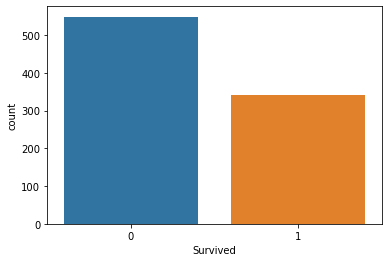

In [854]:
sns.countplot( x="Survived",data=train_df)


More passengers died (549) than survived (342)

### categorical variables
#### Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

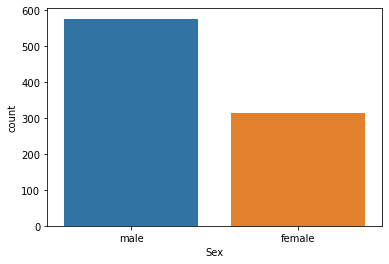

In [855]:
sns.countplot( x="Sex",data=train_df)


<AxesSubplot:xlabel='Sex', ylabel='count'>

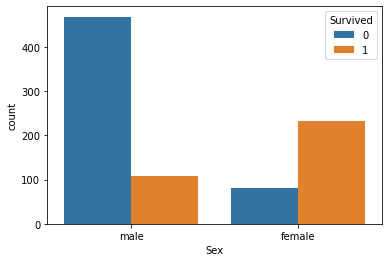

In [856]:
sns.countplot( x="Sex",hue="Survived",data=train_df)


<AxesSubplot:xlabel='Age', ylabel='Count'>

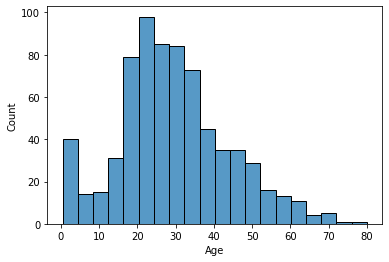

In [857]:
sns.histplot(x="Age",data=train_df)

 more men than women on the ship;
 
 more women survived than men

#### Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

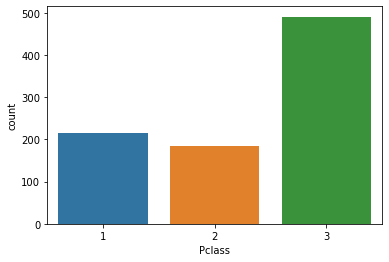

In [858]:
sns.countplot( x="Pclass",data=train_df)


<AxesSubplot:xlabel='Pclass', ylabel='count'>

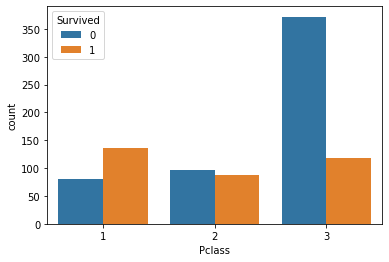

In [859]:
sns.countplot( x="Pclass", hue="Survived",data=train_df)


most passengers were in PClass 3

Pclass 1 passengers had higher survive rate

#### SibSp

<AxesSubplot:xlabel='SibSp', ylabel='count'>

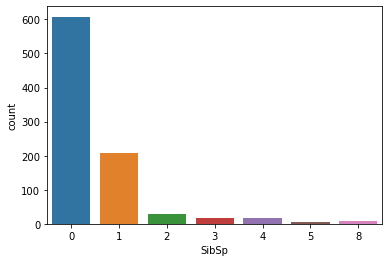

In [860]:
sns.countplot( x="SibSp",data=train_df)


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

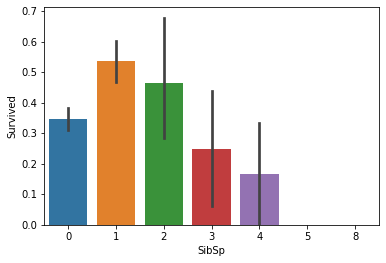

In [861]:
sns.barplot( x="SibSp",y="Survived",data=train_df)


<AxesSubplot:xlabel='SibSp', ylabel='Pclass'>

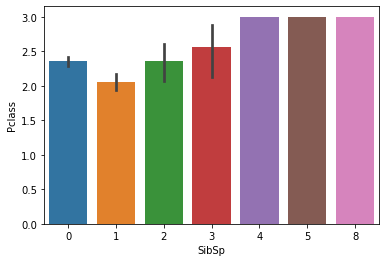

In [862]:
sns.barplot( x="SibSp",y="Pclass",data=train_df)


passengers with 1-2 sibsp have more chances to survive than single passengers

    guess: might get help from families

the chance to survive decrease as sibsp increases
    
    guess: might spent more time to help families
    
0 chance for 5-8 sibsp

    guess: families with more children might be in Pclass3

### Parch 

<AxesSubplot:xlabel='Parch', ylabel='count'>

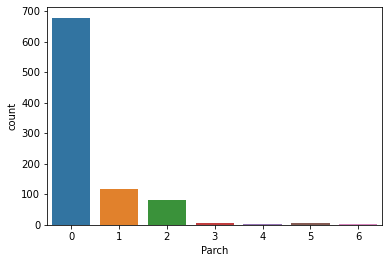

In [863]:
sns.countplot( x="Parch",data=train_df)


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

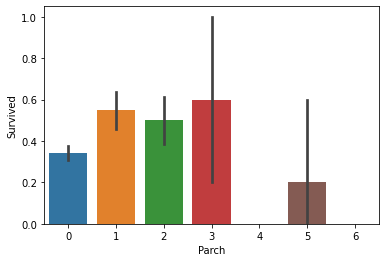

In [864]:
sns.barplot( x="Parch",y="Survived",data=train_df)


passengers with 1-3 parch had more chances than single passengers

    guess：get help from parents

the chance to survive decreases when passengers with over 4 parch 
        
    guess: parents need to help other siblings, 
    
           families with more children live in Pclass 3

### Cabin

In [865]:
train_df.Cabin.unique() #too many missing values. impracticable to fill them

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Embarked


In [866]:
train_df.Embarked.unique()# 2 are missing

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

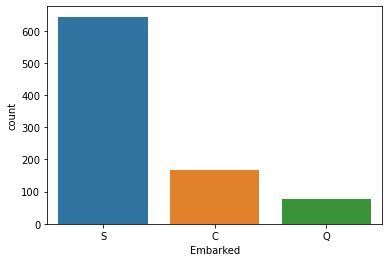

In [867]:
sns.countplot(x="Embarked", data=train_df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

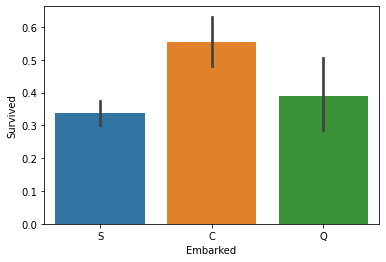

In [868]:
sns.barplot(x="Embarked",y="Survived", data=train_df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

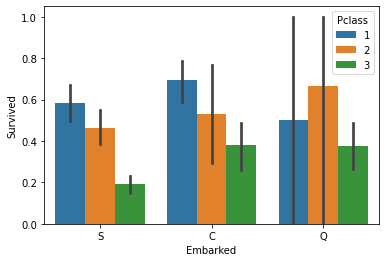

In [869]:
sns.barplot(x="Embarked",hue="Pclass",y="Survived", data=train_df)

In [870]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked might be related with Cabin, ticket, and Fare

In [871]:
df=train_df[train_df["Cabin"].notnull()]

In [872]:
df=df[df["Cabin"].str.startswith("B")]# check cabin and Embarked and no direct relation found

In [873]:
df=train_df[train_df["Ticket"].str.startswith('1135')]# no direct relation found between ticket and Embarked

In [874]:
# fill Embarked with mode. the one with the highest frequency
mode=str(train_df.Embarked.mode())
print(mode)
train_df["Embarked"]=train_df["Embarked"].fillna(mode)
train_df.isnull().sum()

0    S
dtype: object


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Numerical variables
### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

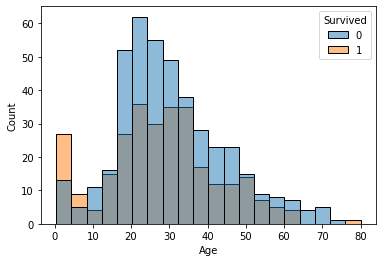

In [875]:
sns.histplot(x="Age",hue="Survived",data=train_df)

#### Obeservations
<10: more childeren under 10(or even under 15) survived than died


70-80: only few passengers were above 70, and only 1 passenger was above 80

only 1 person above 70(or even above 65) survived.


most passengers (both suvived and died) aged in the range of 20 to 40

#### fill missing values


Age might be related with SibSp, Parch, and Name(title),

first, let us create title feature from the Name feature for whole dataset

In [876]:
# get title from the name
data['title']=0

data['title']=data.Name.str.extract('([A-Za-z]+)\.')


data['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [877]:
data['title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Miss'],inplace=True)
data['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

<AxesSubplot:xlabel='Age', ylabel='title'>

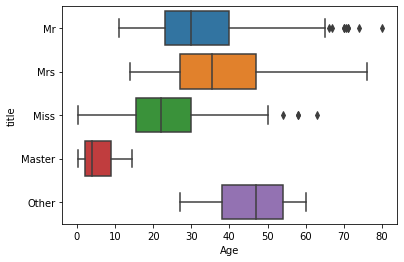

In [878]:
sns.boxplot(x="Age",y="title",data=data)

<AxesSubplot:xlabel='Parch', ylabel='Age'>

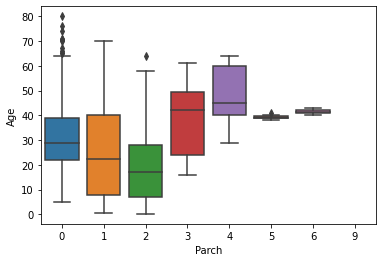

In [879]:
sns.boxplot(y="Age",x="Parch",data=data)

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

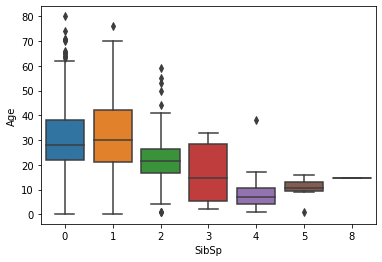

In [880]:
sns.boxplot(y="Age",x="SibSp",data=data)

Sibsp (-), Parch(+),and title are correlated with age

In [881]:
index = list(data["Age"][data["Age"].isnull()].index)
print(index)

[5, 17, 19, 26, 28, 29, 31, 32, 36, 42, 45, 46, 47, 48, 55, 64, 65, 76, 77, 82, 87, 95, 101, 107, 109, 121, 126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186, 196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264, 270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330, 334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388, 409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457, 459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507, 511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563, 564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612, 613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680, 692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768, 773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837, 839, 846, 849, 859, 863, 868, 878, 888, 901, 913, 920, 924, 927, 930, 932, 938, 945, 949, 956, 967, 974, 975, 976, 979, 982, 984, 993, 998, 999, 1002, 1007, 1012, 1015, 1018, 10

In [882]:
for i in index:
    age_med = data["Age"].median()
    age_pred=data["Age"][(data["SibSp"]==data.iloc[i]["SibSp"])&(data["Parch"]==data.iloc[i]["Parch"])&(data["title"]==data.iloc[i]["title"])].median()

    
    if not np.isnan(age_pred):
        data['Age'].iloc[i]= age_pred
    
    else :
        data['Age'].iloc[i]= age_med


<AxesSubplot:xlabel='Survived', ylabel='Age'>

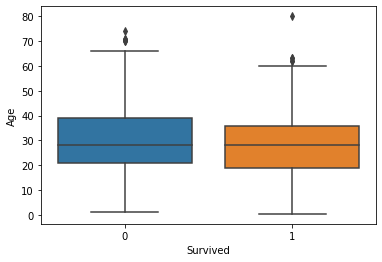

In [883]:
sns.boxplot(y="Age",x="Survived",data=train_df)

### Fare

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

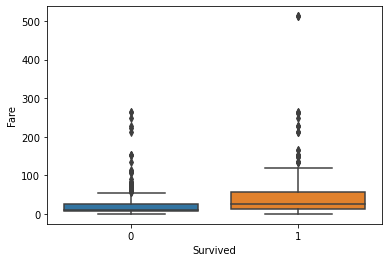

In [884]:
sns.boxplot(y="Fare",x="Survived",data= train_df)


fare is related with Pclass

Text(0.5, 1.0, 'Pclass1')

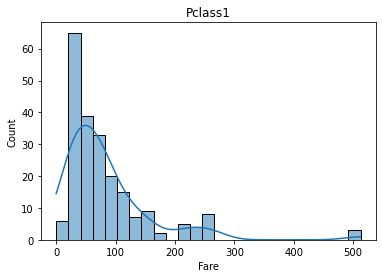

In [885]:
sns.histplot(x="Fare",kde=True,data=train_df[train_df["Pclass"]==1])
plt.title("Pclass1")




Text(0.5, 1.0, 'Pclass2')

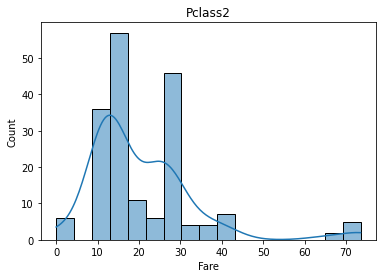

In [886]:


sns.histplot(x="Fare",kde=True,data=train_df[train_df["Pclass"]==2])
plt.title("Pclass2")


Text(0.5, 1.0, 'Pclass3')

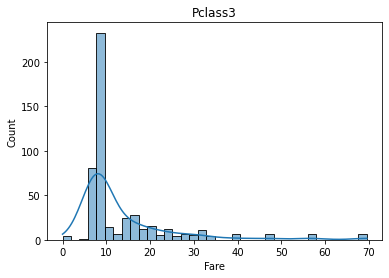

In [887]:
sns.histplot(x="Fare",kde=True,data=train_df[train_df["Pclass"]==3])
plt.title("Pclass3")

### fill missing value for fare in test data using the mode  of Pclass 3 fare

In [888]:


test_df[test_df["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [889]:
mode=train_df["Fare"][(train_df["Pclass"]==3)].mode()
print(mode)
data["Fare"].fillna(8.05, inplace=True)
data.isnull().sum()

0    8.05
dtype: float64


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
title             0
dtype: int64

### Correlation among features

<AxesSubplot:>

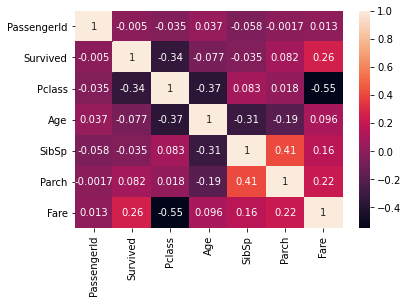

In [890]:
sns.heatmap(train_df.corr(),annot=True)

we didn't find extremely high correlation among features

## 4 Feature managing and data cleansing



#### transform continuous variables to categorical variables

#### Age_band


In [891]:
labels=["0-16","16-32","32-48","48-64","64-80"]
data["Age_band"]=pd.cut(data.Age,bins=5,labels=labels)
data["Age_band"].unique()

['16-32', '32-48', '48-64', '0-16', '64-80']
Categories (5, object): ['0-16' < '16-32' < '32-48' < '48-64' < '64-80']

#### Fare_band

In [892]:
labels=["0-8","8-11","11-22","22-42","42-512"]
data["Fare_band"]=pd.qcut(data.Fare,5,labels=labels)
data["Fare_band"].unique()


['0-8', '42-512', '8-11', '11-22', '22-42']
Categories (5, object): ['0-8' < '8-11' < '11-22' < '22-42' < '42-512']

#### transform string values to numerical 


In [893]:
data['Sex']=data['Sex'].map({"male":0,"female":1})

In [894]:
data['title']=data["title"].map({'Mr':0,'Mrs':0,'Miss':0,'Master':0,'Other':1})

In [895]:
data['Embarked'].replace(['C','Q','S'],[0,1,2],inplace=True)

In [896]:
df=pd.get_dummies(data, columns=['Embarked'])
df=pd.get_dummies(df, columns=['Age_band'])
df=pd.get_dummies(df, columns=['Fare_band'])
df=pd.get_dummies(df, columns=['Pclass'])

In [897]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age_band_48-64,Age_band_64-80,Fare_band_0-8,Fare_band_8-11,Fare_band_11-22,Fare_band_22-42,Fare_band_42-512,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,1,0,0,0,0,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,1,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,1,0,0,0,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,...,0,0,0,1,0,0,0,0,0,1


In [898]:
list(df.columns)

['PassengerId',
 'Survived',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'title',
 'Embarked_0.0',
 'Embarked_1.0',
 'Embarked_2.0',
 'Age_band_0-16',
 'Age_band_16-32',
 'Age_band_32-48',
 'Age_band_48-64',
 'Age_band_64-80',
 'Fare_band_0-8',
 'Fare_band_8-11',
 'Fare_band_11-22',
 'Fare_band_22-42',
 'Fare_band_42-512',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

Drop unneeded features
\
PassengerID

Name

Age

Ticket

Fare

Cabin

Embarked


In [899]:
df.drop(['PassengerId',"Name","Age","Ticket","Fare","Cabin"],axis=1,inplace=True)


In [900]:
df.head()

,Survived,Sex,SibSp,Parch,title,Embarked_0.0,Embarked_1.0,Embarked_2.0,Age_band_0-16,Age_band_16-32,...,Age_band_48-64,Age_band_64-80,Fare_band_0-8,Fare_band_8-11,Fare_band_11-22,Fare_band_22-42,Fare_band_42-512,Pclass_1,Pclass_2,Pclass_3
0,0.0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,1.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,1.0,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,1.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


<AxesSubplot:>

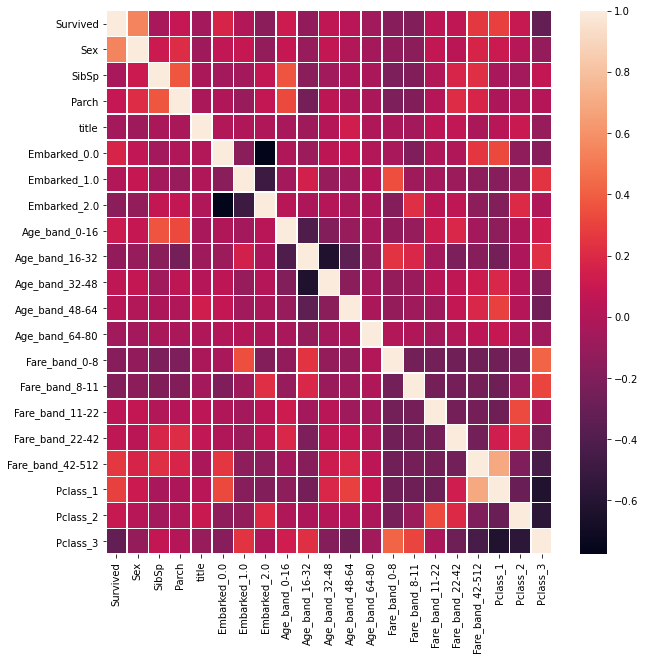

In [901]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(df.corr(),annot=False,linewidths=0.5,annot_kws={'size':20})

### 5 ML modeling
1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)K-Nearest Neighbours

4)Naive Bayes

5)Decision Tree

6)Random Forest

7)Adaboost

In [902]:
# seperate Train data and Test data

In [908]:
train1=df[:train_len]
test1=df[train_len:]

In [909]:
test1.drop(["Survived"],axis=1,inplace=True)

In [952]:
# split train data into train data and test data
train,test=train_test_split(train1,test_size=0.3,random_state=0,stratify=train1['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train1[train1.columns[1:]]
Y=train1['Survived']




#### Logistic Regression¶


In [916]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction1,test_Y))

The accuracy of the Logistic Regression is 0.7985074626865671


#### Linear Support Vector Machine(linear-SVM)¶


In [920]:
model=svm.SVC(kernel='linear',C=1.0,gamma="scale")
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.7910447761194029


#### radial Support Vector Machine(rbf-SVM)¶


In [925]:
model=svm.SVC(kernel='rbf',C=1.0,gamma="scale")
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Accuracy for radial SVM is',metrics.accuracy_score(prediction3,test_Y))

Accuracy for radial SVM is 0.8470149253731343


#### K-Nearest Neighbours

In [927]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the KNN is 0.7798507462686567


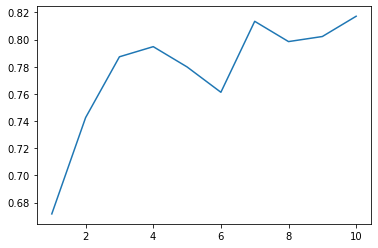

Accuracies for different values of n are: [0.67164179 0.74253731 0.78731343 0.79477612 0.77985075 0.76119403
 0.81343284 0.79850746 0.80223881 0.81716418] with the max value as  0.8171641791044776


In [928]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)

plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

#### Naive Bayes


In [931]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the NaiveBayes is 0.4253731343283582


#### Decision Tree

In [933]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the Decision Tree is 0.7798507462686567


#### Random Forests¶


In [934]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8097014925373134


#### AdaBoost

In [1152]:
model=AdaBoostClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction8=model.predict(test_X)
print('The accuracy of the AdaBoost is',metrics.accuracy_score(prediction8,test_Y))

The accuracy of the AdaBoost is 0.7910447761194029


#### Gradient Boost

In [1013]:
model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
model.fit(train_X,train_Y)
prediction9=model.predict(test_X)
print('The accuracy of the GradientBoost is',metrics.accuracy_score(prediction9,test_Y))

The accuracy of the GradientBoost is 0.8059701492537313


### cross validation

In [994]:
kfold = KFold(n_splits=10,random_state=42) # k=10, split the data into 10 equal parts

In [1153]:
cvmean=[] # cv mean
accuracy=[] # CV score
cvstd=[] # CV standard deviation
classifiers=['Logistic Regression','Linear Svm','Radial Svm','KNN','Naive Bayes','Decision Tree','Random Forest','AdaBoost', 'GradientBoosting']
models=[LogisticRegression(),svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),KNeighborsClassifier(n_neighbors=10),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100),AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100),GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)]
for i in models:
    model = i
    
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    
    cv_result=cv_result
    cvmean.append(cv_result.mean())
    cvstd.append(cv_result.std())
    accuracy.append(cv_result)
    
cv_df=pd.DataFrame({'CV Mean':cvmean,'Std':cvstd, 'model': classifiers})       
cv_df

,CV Mean,Std,model
0,0.782285,0.029664,Logistic Regression
1,0.786729,0.039372,Linear Svm
2,0.824931,0.029707,Radial Svm
3,0.776742,0.039361,KNN
4,0.677903,0.112322,Naive Bayes
5,0.803596,0.030219,Decision Tree
6,0.819326,0.032599,Random Forest
7,0.819313,0.031096,AdaBoost
8,0.813733,0.036397,GradientBoosting


Text(0.5, 1.0, 'Cross-validation Accuracy')

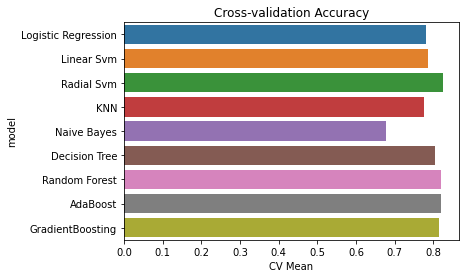

In [1154]:
sns.barplot(x="CV Mean",y='model',data=cv_df)
plt.title("Cross-validation Accuracy")

#### Confusion Matrix 

we choose randomforest, Adaboosting, radial Svm, and GradientBoosting


rbf-svc is good at predicting dead, since it has the least False Negative (survived and predicted dead);

Random forest is good at predicting survive, since it has the least False Positive (dead and predicted survived).

Text(0.5, 1.0, 'confusion matrix for GradientBoosting')

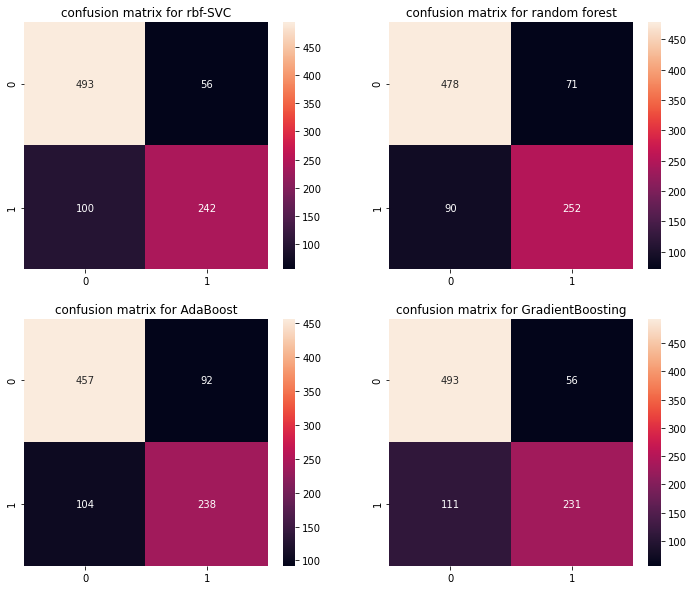

In [1155]:
f,ax=plt.subplots(2,2,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True,ax=ax[0,0],fmt='2.0F')
ax[0,0].set_title("confusion matrix for rbf-SVC")
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True,ax=ax[0,1],fmt='2.0F')
ax[0,1].set_title("confusion matrix for random forest")

y_pred = cross_val_predict(AdaBoostClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True,ax=ax[1,0],fmt='2.0F')
ax[1,0].set_title("confusion matrix for AdaBoost")
y_pred = cross_val_predict(GradientBoostingClassifier(n_estimators=100,learning_rate=0.1),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True,ax=ax[1,1],fmt='2.0F')
ax[1,1].set_title("confusion matrix for GradientBoosting")

### Hyperparameter tunning for best models¶

We will tune the hyper-parameters for the 4 best classifiers i.e the SVM, RandomForests, AdaBoosting, GB
#### SVM



In [1128]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
svm_best=gd.best_estimator_
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.830500282468144
SVC(C=0.3, gamma=0.3)
{'C': 0.3, 'gamma': 0.3, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   24.9s finished


#### Random Forest

In [1114]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
randomforest_best=gd.best_estimator_
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   45.0s finished


0.8215366267026551
RandomForestClassifier(n_estimators=200, random_state=0)
{'n_estimators': 200}


#### AdaBoosting

In [1172]:
n_estimators=range(100,1000,100)
learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

hyper={'n_estimators':n_estimators,'learning_rate':learning_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
AdaBoost_best=gd.best_estimator_
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

#### Gradient Boosting

In [1157]:
n_estimators=range(100,1000,100)
learning_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

hyper={'n_estimators':n_estimators,'learning_rate':learning_rate}
gd=GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
GradientBoost_best=gd.best_estimator_
print(gd.best_score_)
print(gd.best_estimator_)
print(gd.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8204318624066286
GradientBoostingClassifier(learning_rate=0.6, random_state=0)
{'learning_rate': 0.6, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  3.6min finished


Text(0.5, 1.0, 'confusion matrix for GradientBoosting')

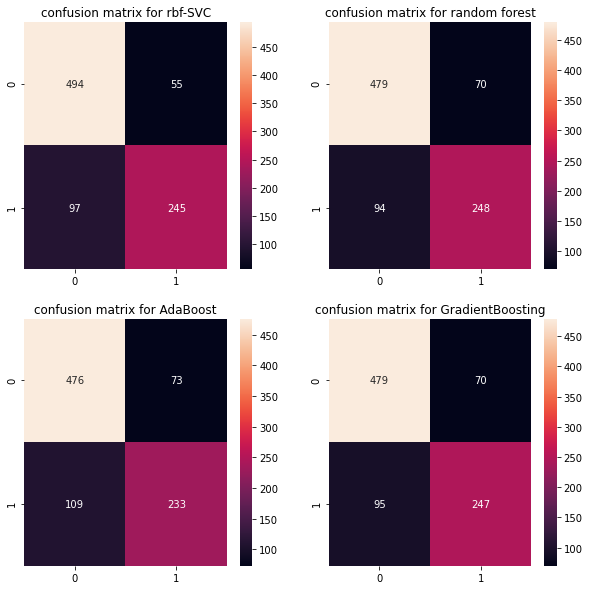

In [1164]:
f,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf',C=0.3,gamma=0.3),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0F')
ax[0,0].set_title("confusion matrix for rbf-SVC")
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=200),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0F')
ax[0,1].set_title("confusion matrix for random forest")
y_pred = cross_val_predict(AdaBoostClassifier(n_estimators=100,learning_rate=0.1),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0F')
ax[1,0].set_title("confusion matrix for AdaBoost")
y_pred = cross_val_predict(GradientBoostingClassifier(n_estimators=100,learning_rate=0.6),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0F')
ax[1,1].set_title("confusion matrix for GradientBoosting")

#### Feature importance for tree based classifier


Text(0.5, 1.0, 'Feature Importance in Random Forests')

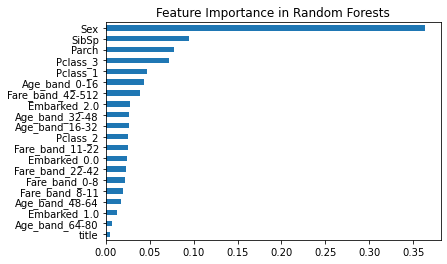

In [1165]:

feature_importance=pd.Series(randomforest_best.feature_importances_,index=X.columns)
feature_importance.sort_values(ascending=True).plot.barh()
plt.title('Feature Importance in Random Forests')



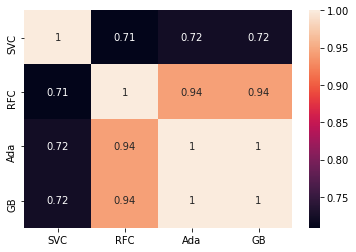

In [1169]:
test_Survived_SVMC = pd.Series(svm_best.predict(test1), name="SVC")
test_Survived_RFC = pd.Series(randomforest_best.predict(test1), name="RFC")
test_Survived_Ada = pd.Series(AdaBoost_best.predict(test1), name="Ada")
test_Survived_GB = pd.Series(GradientBoost_best.predict(test1), name="GB")


results=pd.concat([test_Survived_SVMC,test_Survived_RFC,test_Survived_Ada,test_Survived_GB],axis=1)
g= sns.heatmap(results.corr(),annot=True)
                        

In [1170]:
results.head()


,SVC,RFC,Ada,GB
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [1192]:
### we could use voting to emsemble the models. However, SVM_rbf score is better than voting, so we just use SVC

In [1203]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[
                                              ('RBF',svm_best),
                                              ('RFor',randomforest_best),
                                              ('Ada',AdaBoost_best),
                                              ('GB',GradientBoost_best),
                                    
                                             ], 
                       voting='hard').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8137203495630463


#### we will use SVM_rbf as the final predict model

In [1196]:
ID=test_df['PassengerId']
prediction=svm_best.predict(test1)
df = pd.DataFrame({ 'PassengerId' : ID, 'Survived': prediction })
df.Survived = df.Survived.astype(int)
df.to_csv('submission.csv', index=False)

In [1204]:
ID=test_df['PassengerId']
prediction=ensemble_lin_rbf.predict(test1)
df = pd.DataFrame({ 'PassengerId' : ID, 'Survived': prediction })
df.Survived = df.Survived.astype(int)
df.to_csv('submission.csv', index=False)

In [1207]:
df.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
